# **Heart Disease Prediction using XGBoost and ANN**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [4]:
from xgboost import XGBClassifier

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score

In [7]:
import warnings
warnings.filterwarnings('ignore')

**1. Analysing the data**

In [8]:
df=pd.read_csv('heart_disease.csv')
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [9]:
df.tail()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0
308853,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,45-49,160.0,81.19,31.71,No,1.0,5.0,12.0,1.0


In [10]:
df.shape

(308854, 19)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [12]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [13]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


**2.Exploratory Data Analysis(EDA)**

<Axes: >

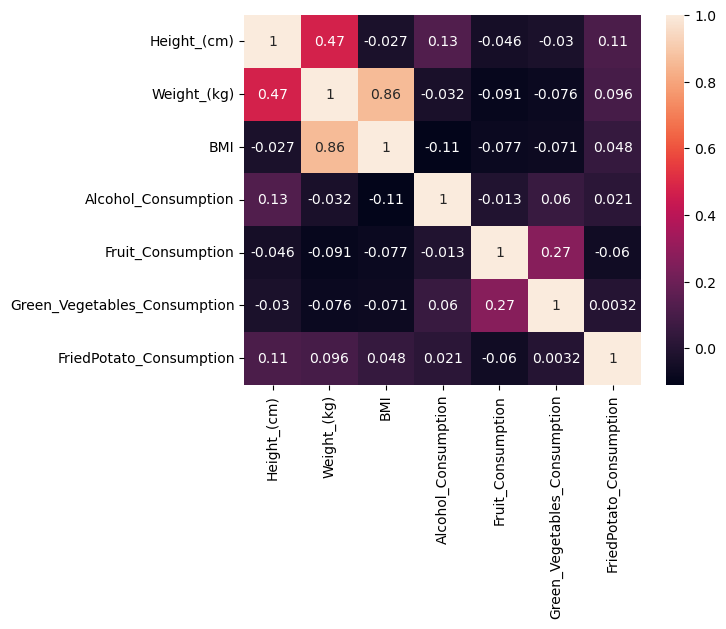

In [14]:
# Filtering only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)

array([[<Axes: title={'center': 'Height_(cm)'}>,
        <Axes: title={'center': 'Weight_(kg)'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Alcohol_Consumption'}>,
        <Axes: title={'center': 'Fruit_Consumption'}>,
        <Axes: title={'center': 'Green_Vegetables_Consumption'}>],
       [<Axes: title={'center': 'FriedPotato_Consumption'}>, <Axes: >,
        <Axes: >]], dtype=object)

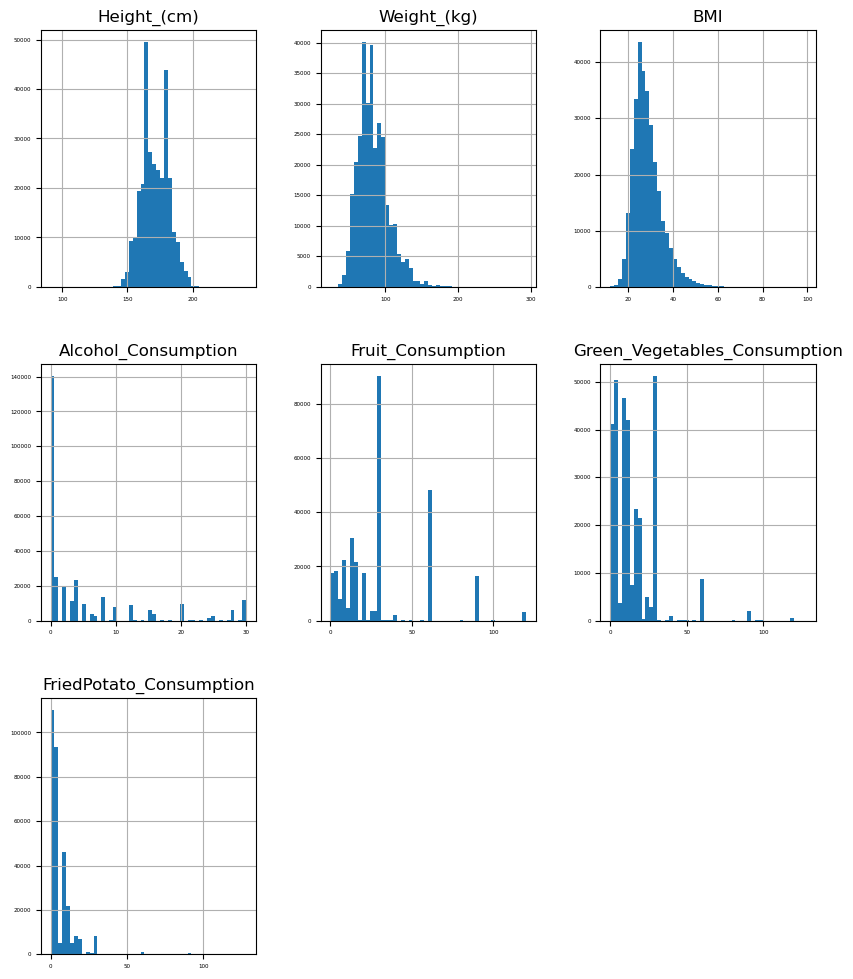

In [15]:
#histogram

numeric_df.hist(figsize=(10, 12), bins=50, xlabelsize=4, ylabelsize=4)

In [16]:
#categorical variables

df2 = df.select_dtypes(include = ['object'])
df2.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,Yes
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,No
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,No
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,No
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,Yes


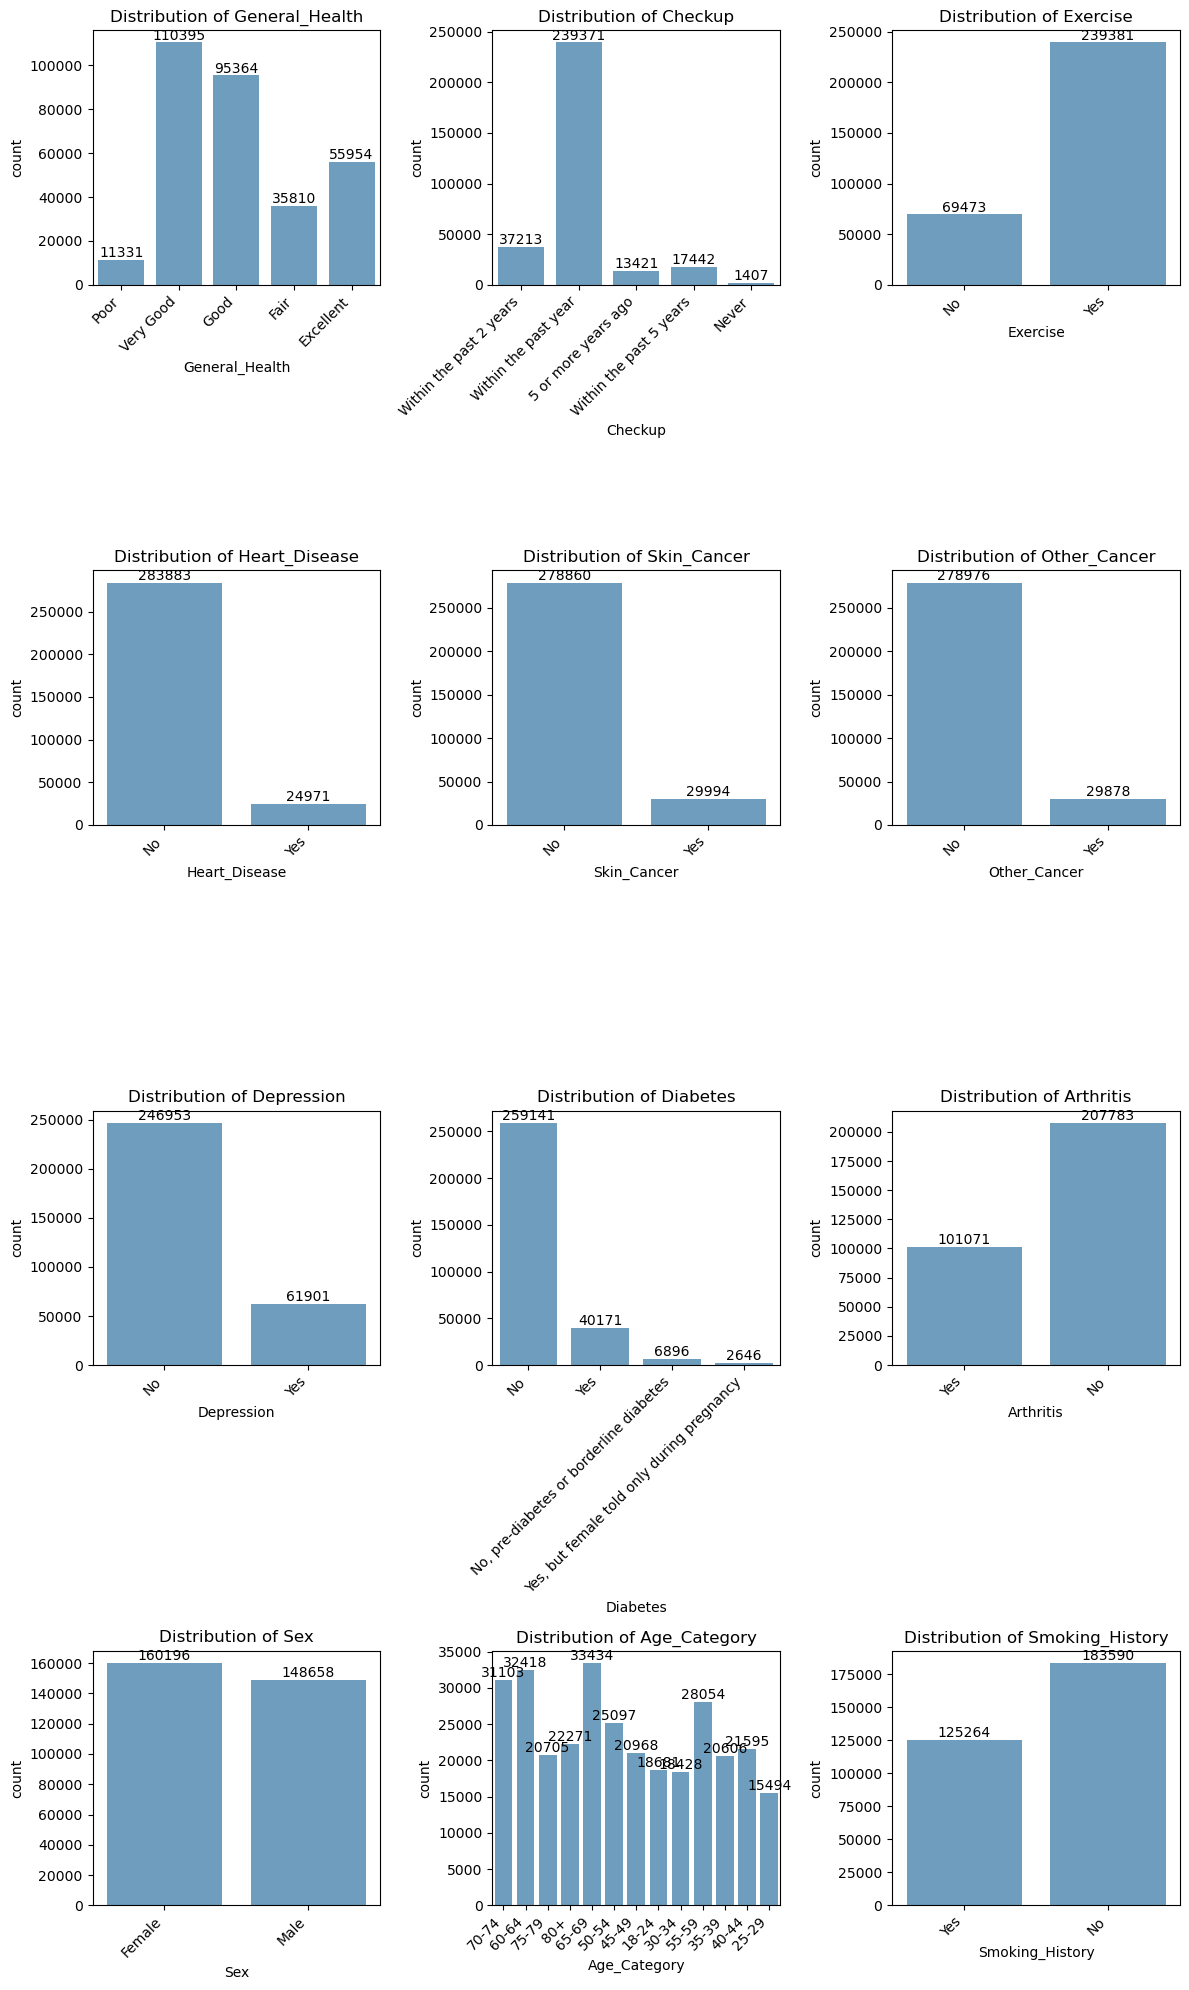

In [17]:
# Create subplot grid
fig, axes = plt.subplots(round(len(df2.columns) / 3), 3, figsize=(12, 20))

axes = axes.flatten()

for i, col in enumerate(df2.columns):
    
    sns.countplot(x=col, data=df2, alpha=0.7, ax=axes[i])
    
    axes[i].set_xticklabels(axes[i].get_xticklabels(), 
                           rotation=45,  # Rotate 45 degrees for better readability
                           ha='right')   
    
    # Add title with column name
    axes[i].set_title(f'Distribution of {col}')
    
    # Add count labels on top of bars
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.0f}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        xytext=(0, 5), 
                        textcoords='offset points')

# Hide any empty subplots
for j in range(len(df2.columns), len(axes)):
    axes[j].set_visible(False)

# Adjust layout
fig.tight_layout()
plt.show()

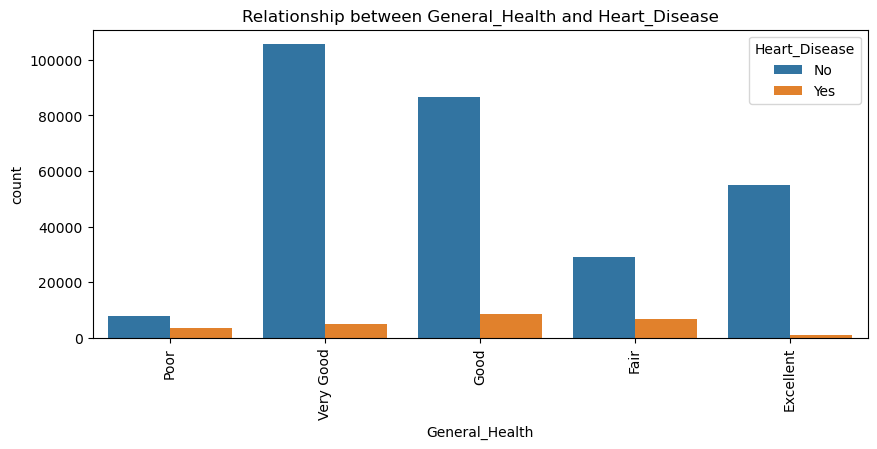

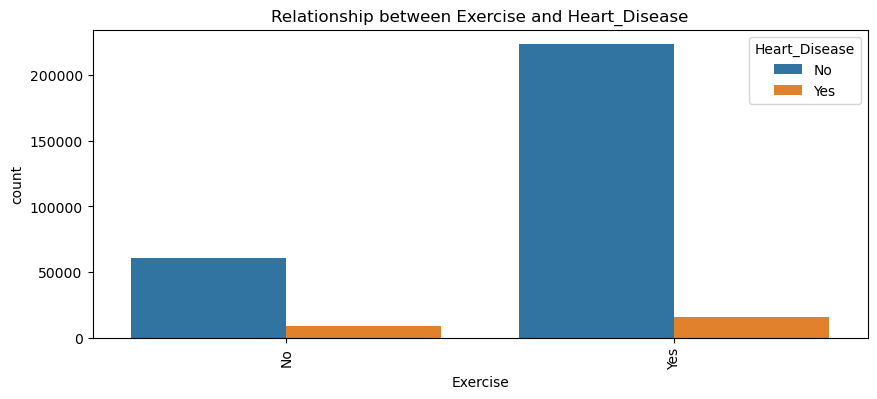

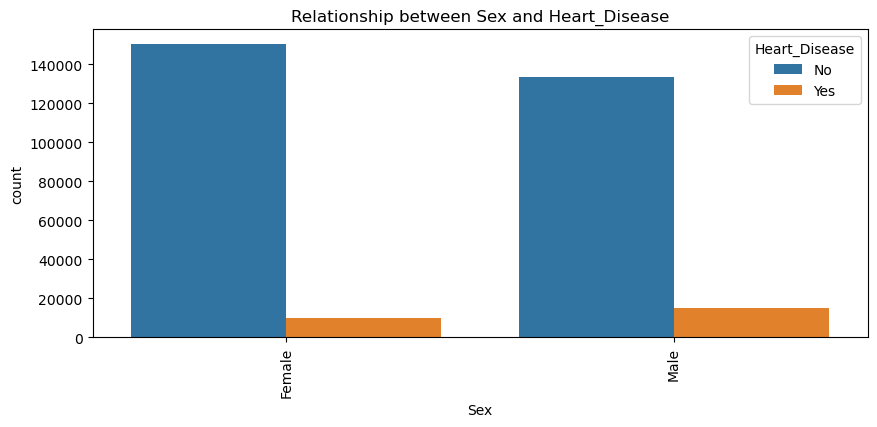

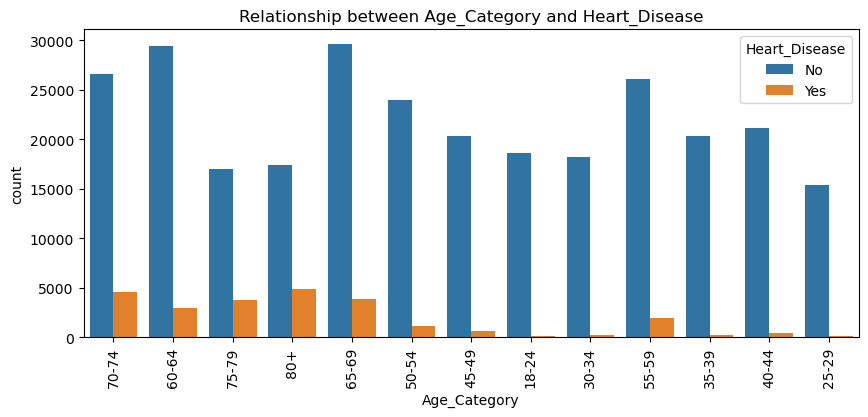

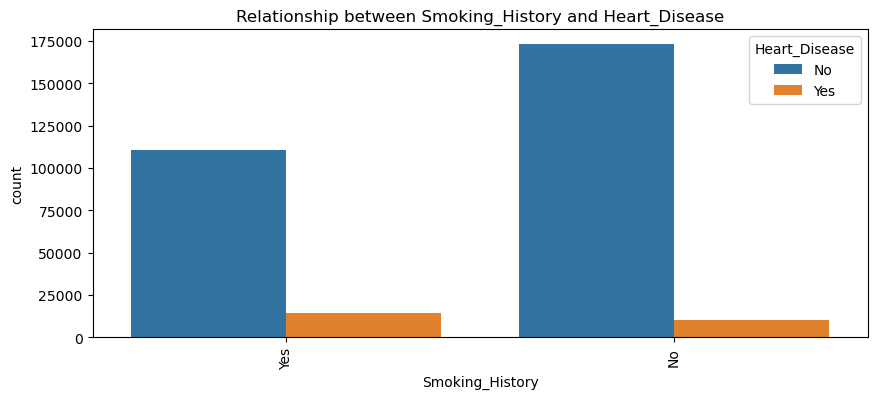

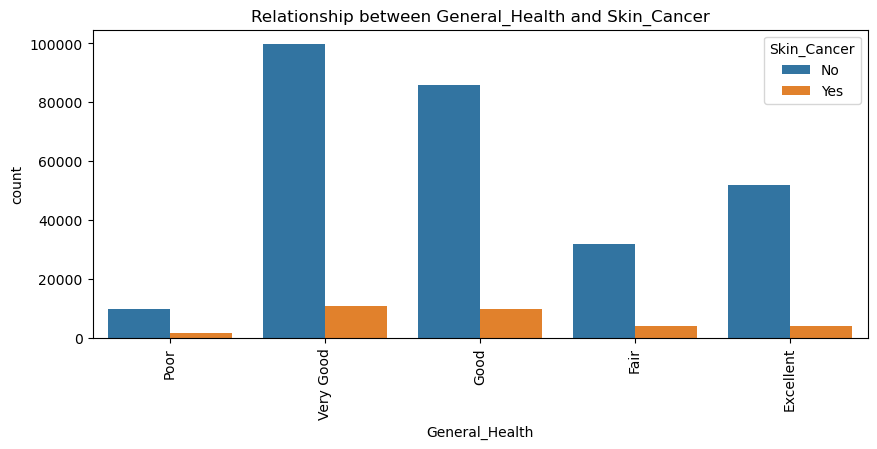

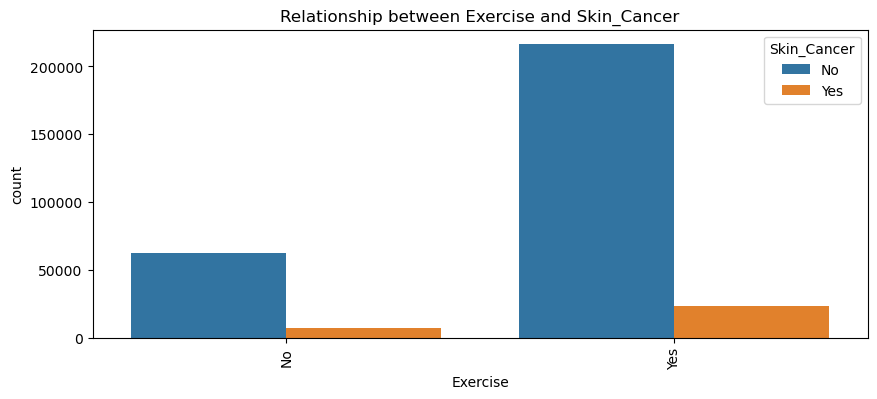

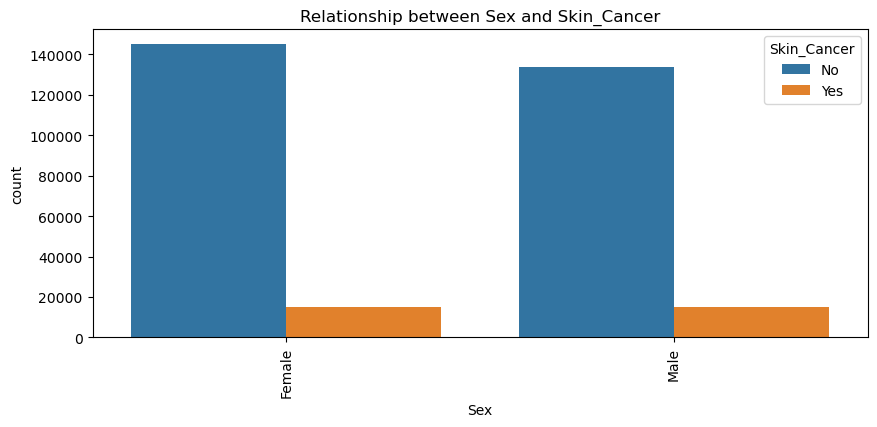

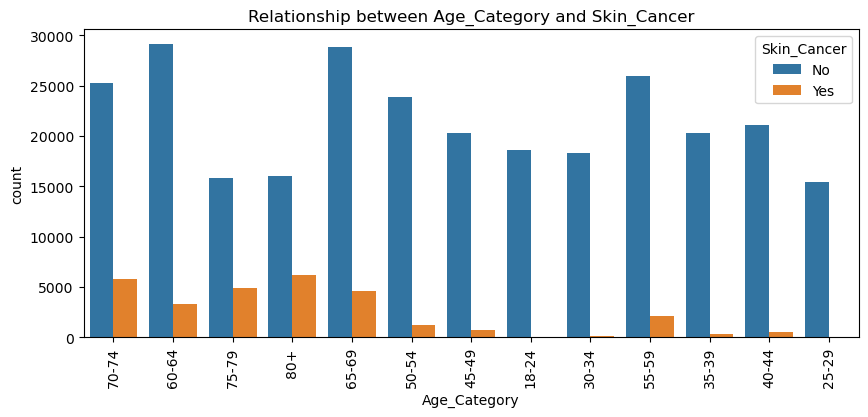

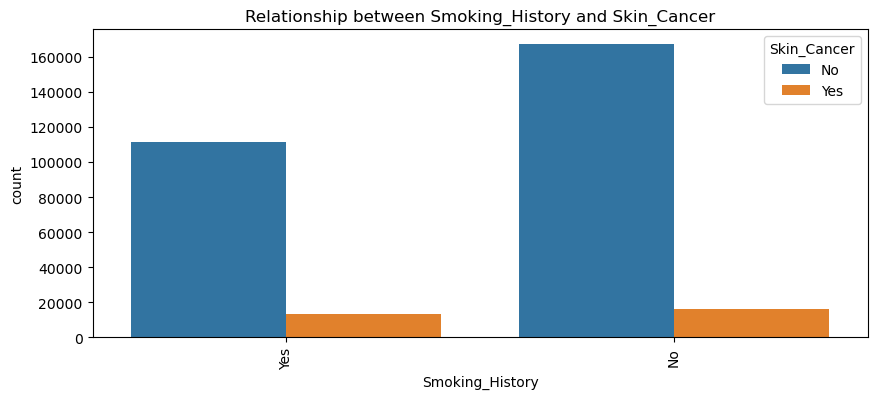

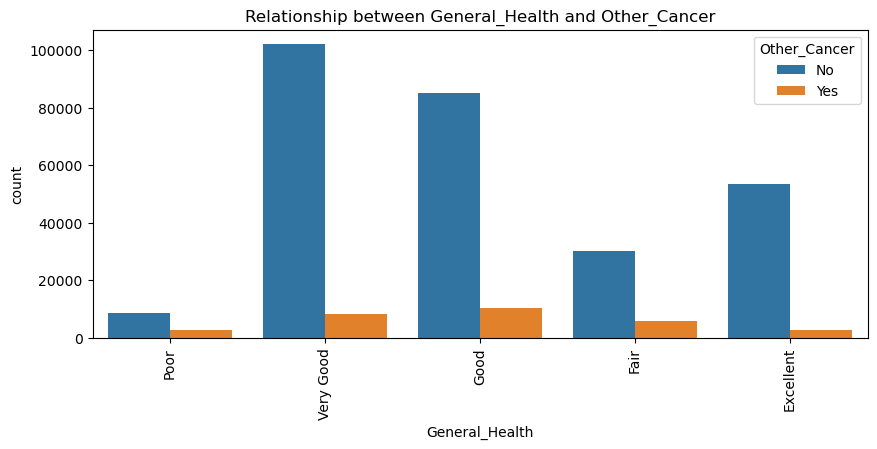

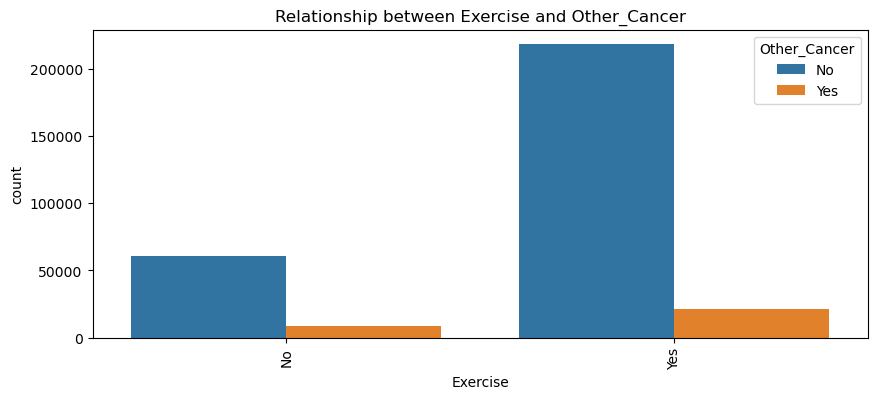

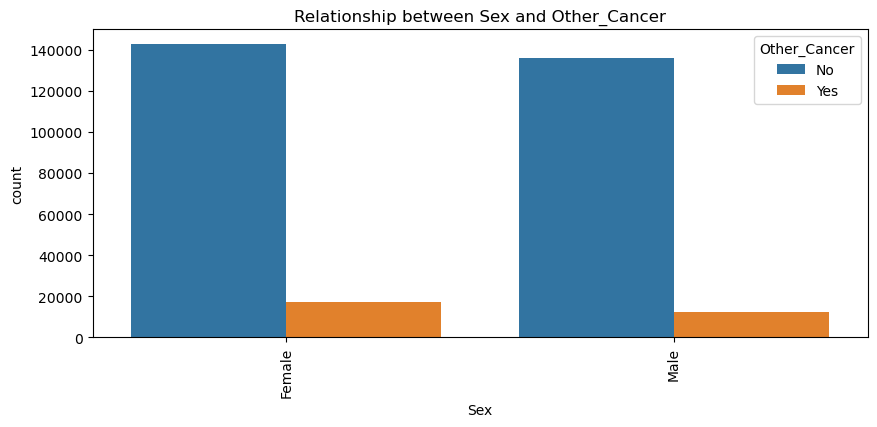

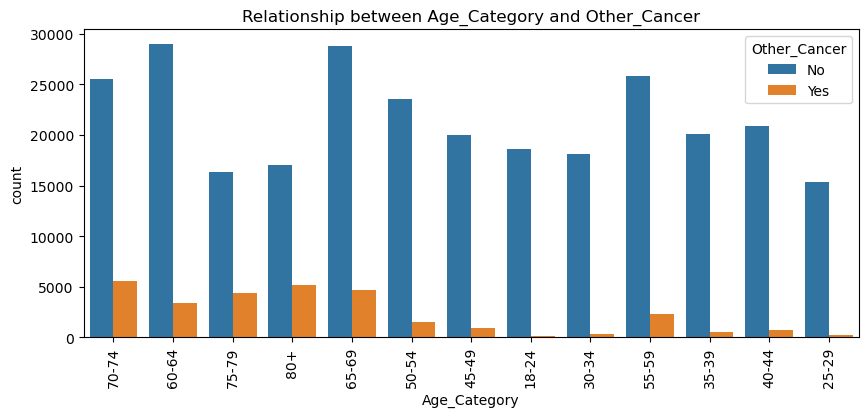

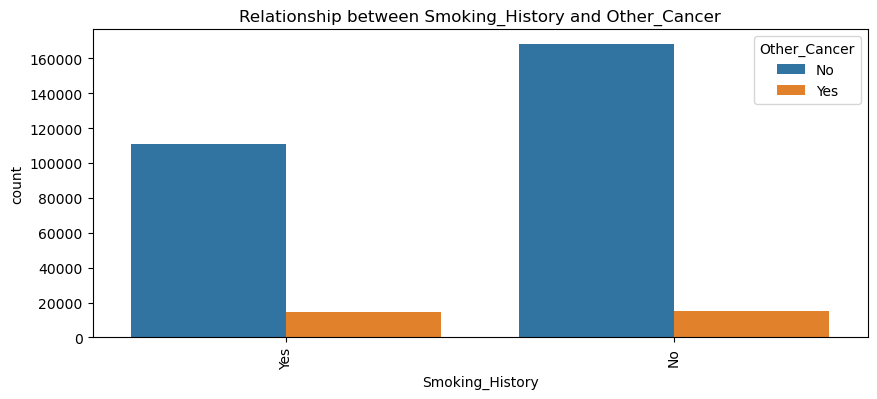

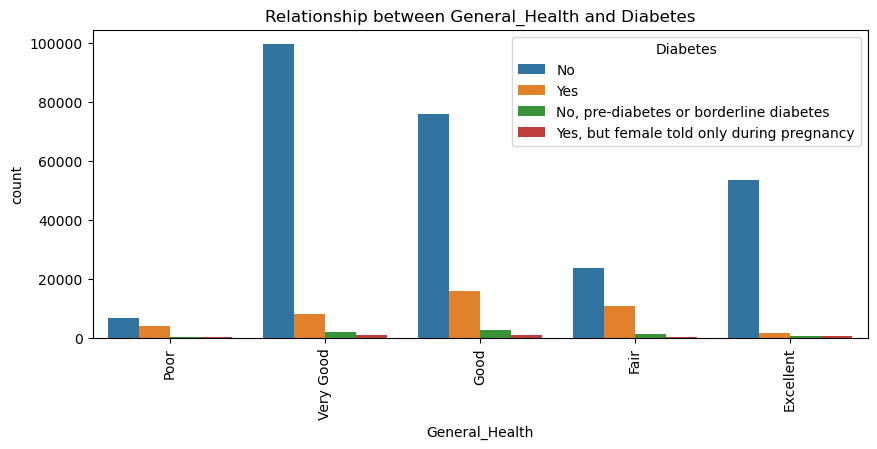

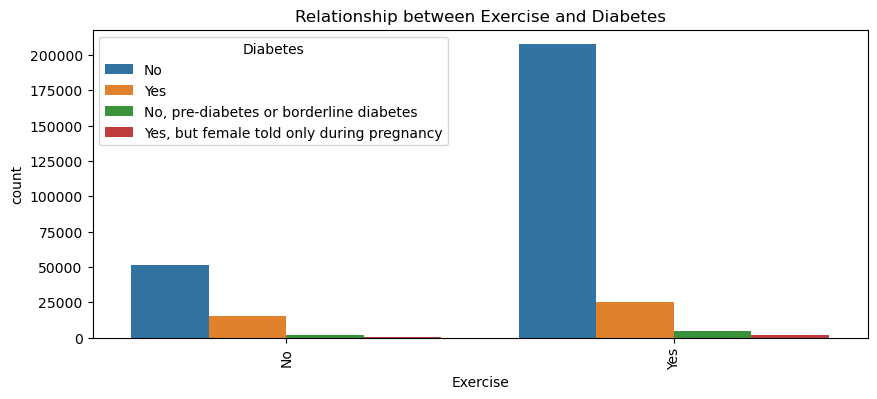

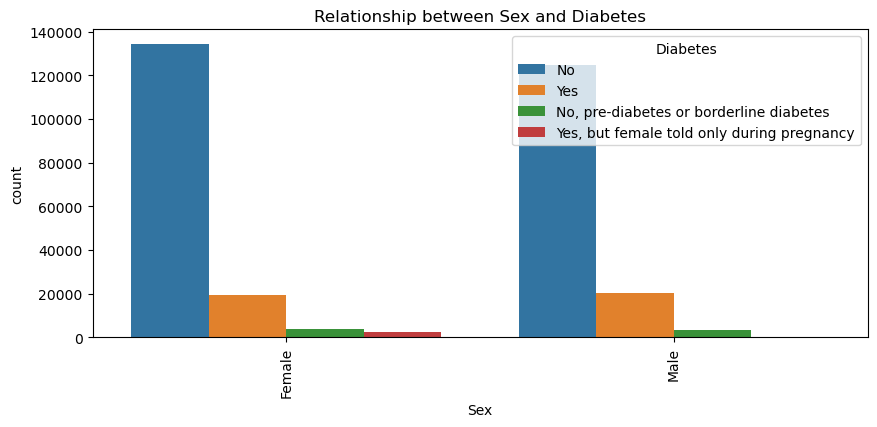

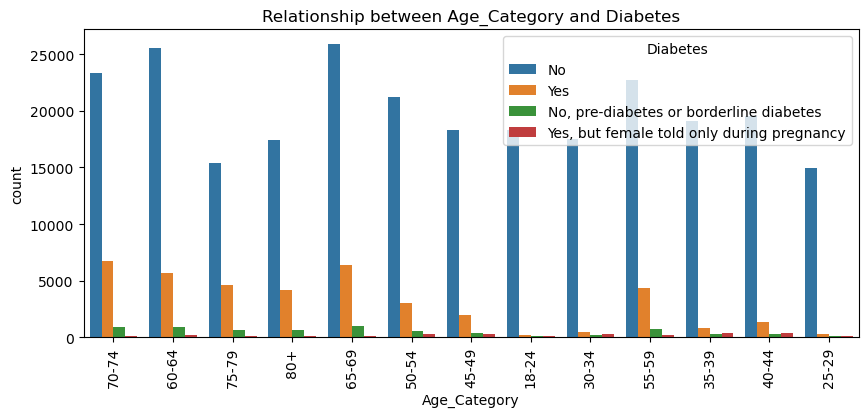

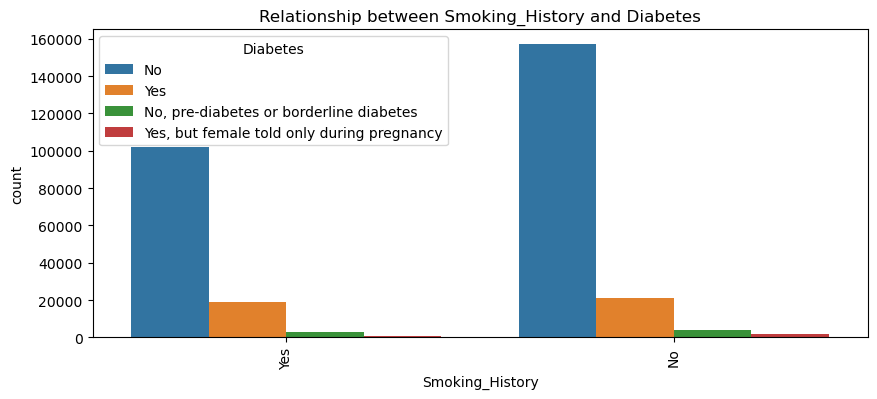

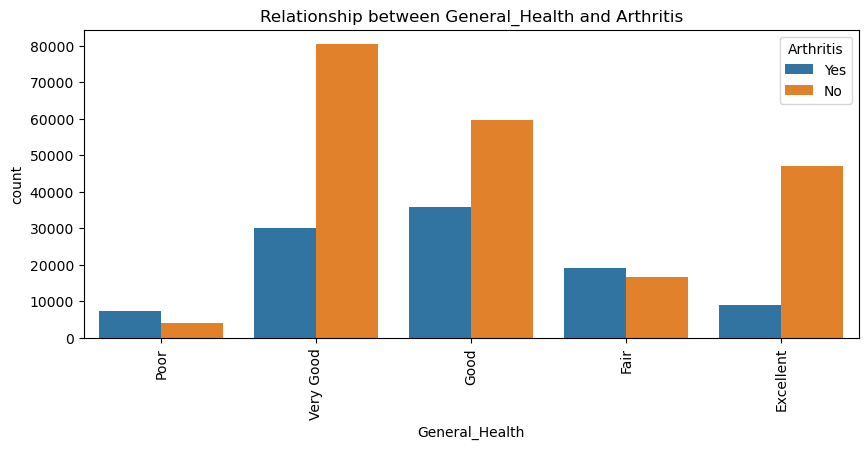

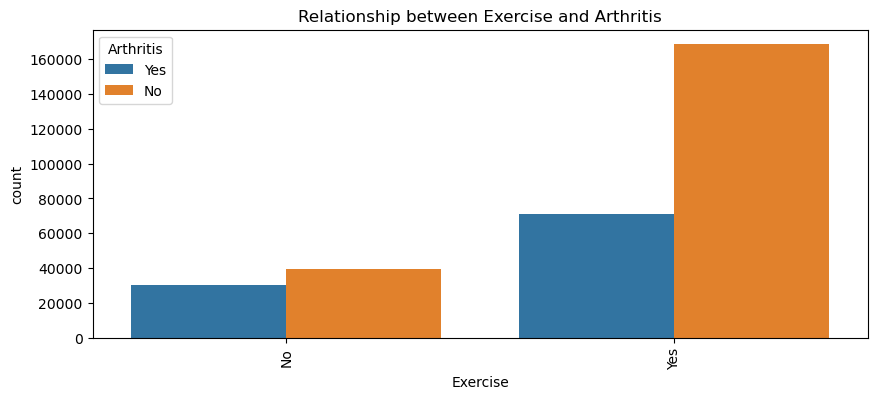

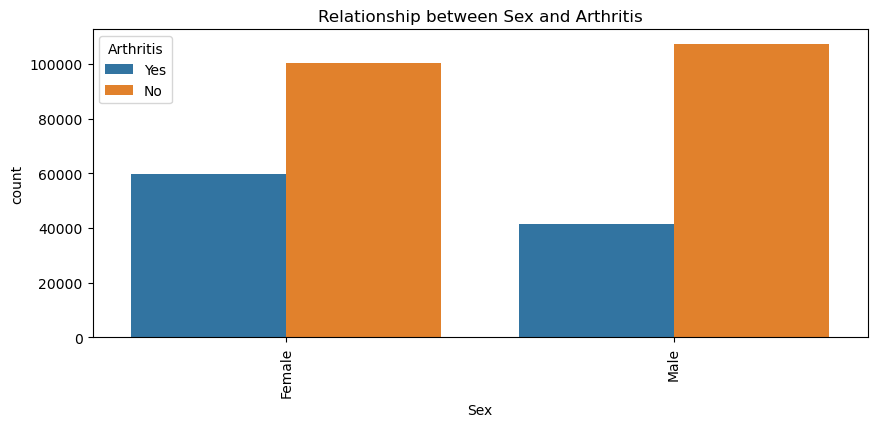

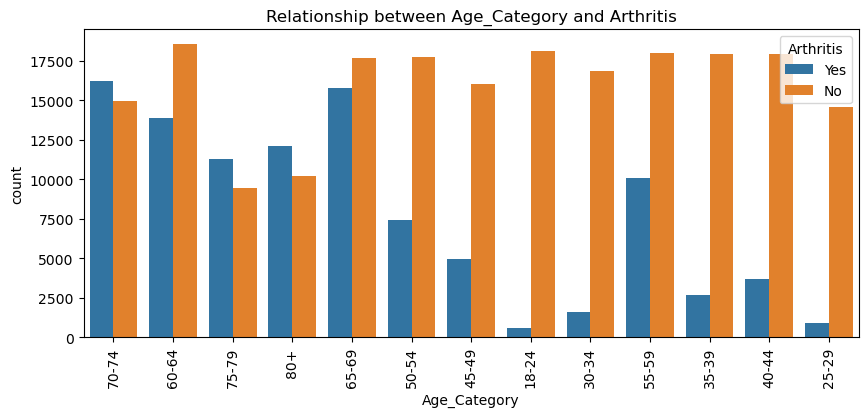

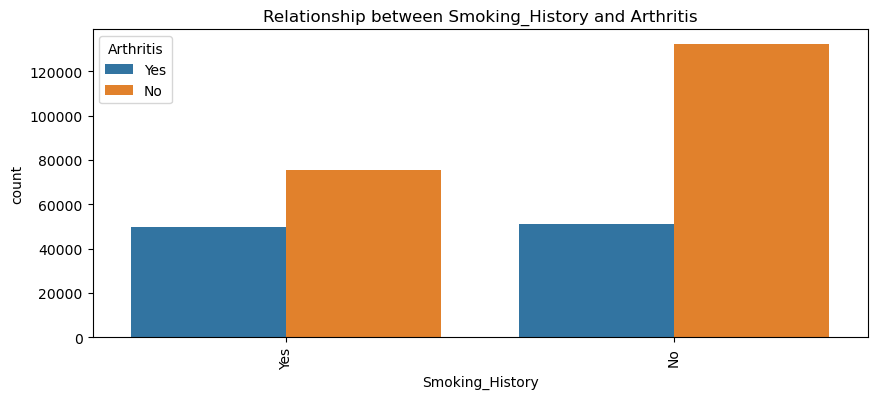

In [18]:
# Analyze the relationship between the disease conditions and some selected variables

selected_variables = ['General_Health', 'Exercise', 'Sex', 'Age_Category', 'Smoking_History']

disease_conditions = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes', 'Arthritis']

for disease in disease_conditions:
    for variable in selected_variables:
        plt.figure(figsize=(10, 4))
        sns.countplot(data=df, x=variable, hue=disease)
        plt.title('Relationship between ' + variable + ' and ' + disease)
        plt.xticks(rotation=90)
        plt.show()

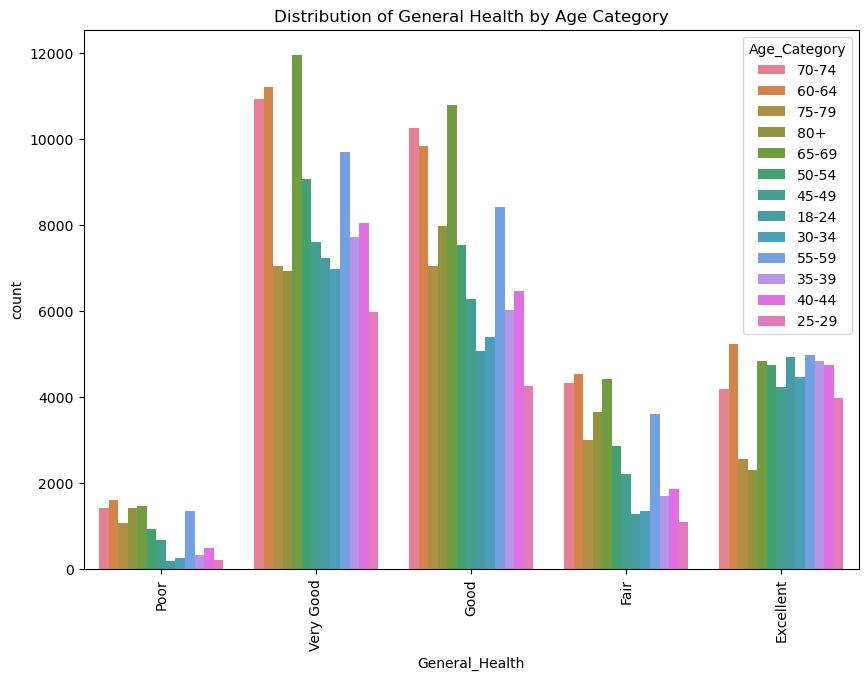

In [19]:
# Multivariate Analysis

plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='General_Health', hue='Age_Category')
plt.title('Distribution of General Health by Age Category')
plt.xticks(rotation=90)
plt.show()

**Outliers**

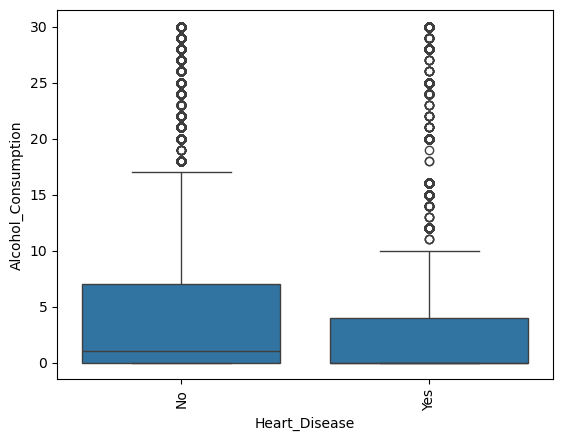

In [20]:
#categorical to quantitative realtionship

sns.boxplot(data=df, x = 'Heart_Disease', y='Alcohol_Consumption')
plt.xticks(rotation='vertical')
plt.show()

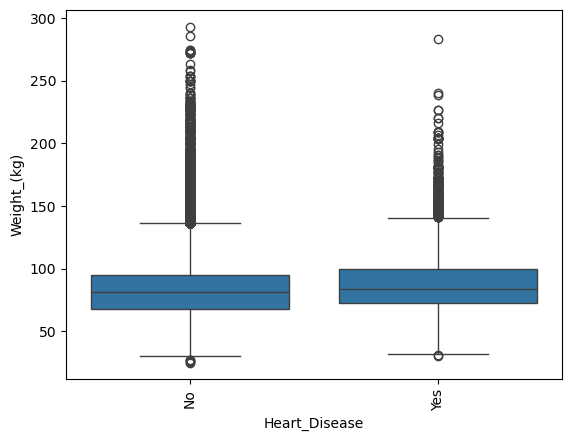

In [21]:
sns.boxplot(data=df, x = 'Heart_Disease', y='Weight_(kg)')
plt.xticks(rotation='vertical')
plt.show()

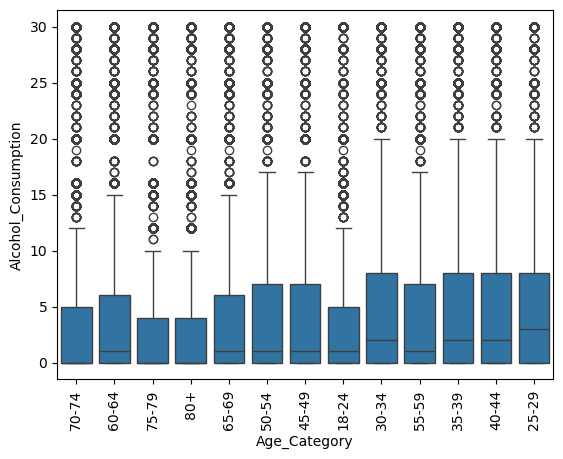

In [22]:
sns.boxplot(data=df, x = 'Age_Category', y='Alcohol_Consumption')
plt.xticks(rotation='vertical')
plt.show()

**3.Data Preprocessing**

In [23]:
#checking for missing values
df.isna().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [24]:
df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

In [25]:
df2.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,Yes
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,No
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,No
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,No
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,Yes


In [26]:
# Iterate through each column
for column_name in df2.columns:
    col=df2[column_name].unique()
    print(f"Unique values in {column_name}:")
    print(col,'\n')

Unique values in General_Health:
['Poor' 'Very Good' 'Good' 'Fair' 'Excellent'] 

Unique values in Checkup:
['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never'] 

Unique values in Exercise:
['No' 'Yes'] 

Unique values in Heart_Disease:
['No' 'Yes'] 

Unique values in Skin_Cancer:
['No' 'Yes'] 

Unique values in Other_Cancer:
['No' 'Yes'] 

Unique values in Depression:
['No' 'Yes'] 

Unique values in Diabetes:
['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy'] 

Unique values in Arthritis:
['Yes' 'No'] 

Unique values in Sex:
['Female' 'Male'] 

Unique values in Age_Category:
['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29'] 

Unique values in Smoking_History:
['Yes' 'No'] 



In [27]:
# Apply label encoding to the categorical columns

gn = LabelEncoder()
ck = LabelEncoder()
ex = LabelEncoder()
sk = LabelEncoder()
oc = LabelEncoder()
dp = LabelEncoder()
db = LabelEncoder()
ar = LabelEncoder()
sx = LabelEncoder()
ag = LabelEncoder()
sm = LabelEncoder()
hd = LabelEncoder()

In [28]:
df['General_Health'] = gn.fit_transform(df['General_Health'])
df['Checkup'] = ck.fit_transform(df['Checkup'])
df['Exercise'] = ex.fit_transform(df['Exercise'])
df['Skin_Cancer'] = sk.fit_transform(df['Skin_Cancer'])
df['Other_Cancer'] = oc.fit_transform(df['Other_Cancer'])
df['Depression'] = dp.fit_transform(df['Depression'])
df['Diabetes'] = db.fit_transform(df['Diabetes'])
df['Arthritis'] = ar.fit_transform(df['Arthritis'])
df['Sex'] = sx.fit_transform(df['Sex'])
df['Age_Category'] = ag.fit_transform(df['Age_Category'])
df['Smoking_History'] = sm.fit_transform(df['Smoking_History'])
df['Heart_Disease'] = hd.fit_transform(df['Heart_Disease'])

**Correlation of each feature with the disease variables**

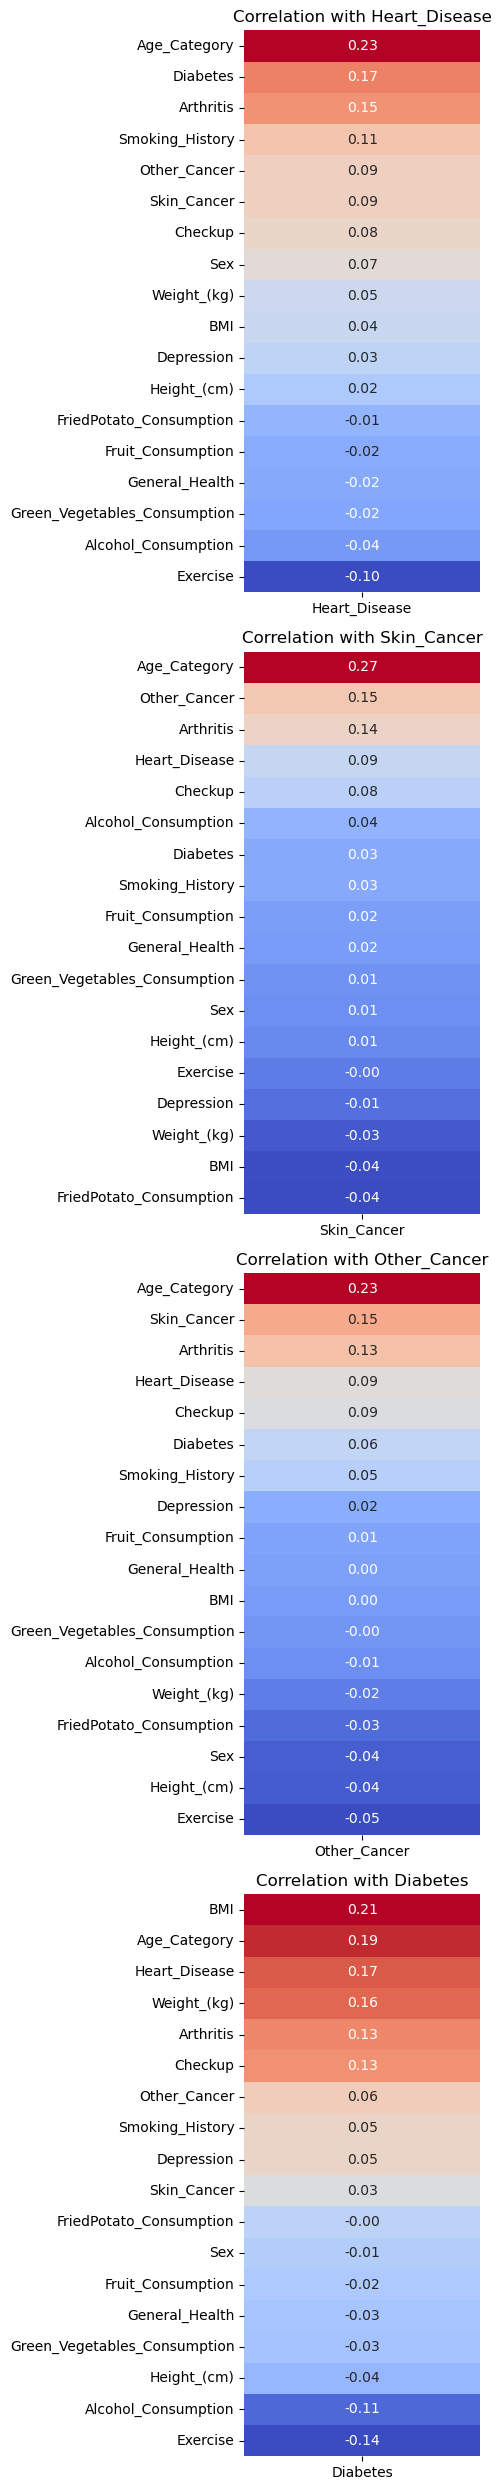

In [29]:
# Compute the correlation of each feature with the disease variables
disease_variables = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes']

# correlation matrix
corr = df.corr()

fig, axs = plt.subplots(len(disease_variables), 1, figsize=(5, 25))

for ax, disease in zip(axs, disease_variables):
    target_corr = corr[disease].drop(disease)
    target_corr_sorted = target_corr.sort_values(ascending=False)

    # Plot a heatmap
    sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True,
                fmt='.2f', cbar=False, ax=ax)
    ax.set_title('Correlation with ' + disease)

plt.tight_layout()
plt.show()

In [30]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,2,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,2,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,3,4,1,1,0,0,0,2,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [31]:
# Count duplicates
duplicate_count = df.duplicated().sum()

print("Number of duplicates:", duplicate_count)

data = df.drop_duplicates()
print('duplicates removed')

Number of duplicates: 80
duplicates removed


In [32]:
df.shape

(308854, 19)

splitting input and output data

In [33]:
X=df.drop(columns=['Heart_Disease'])
y=df['Heart_Disease']

In [34]:
#scaling the data

sc=MinMaxScaler()
X_sc=sc.fit_transform(X)

In [35]:
df['Heart_Disease'].value_counts()

Heart_Disease
0    283883
1     24971
Name: count, dtype: int64

## 4. Model Building and Evaluation

In [36]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

**KNN Classifier**

In [37]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
y_pred_knn

  File "c:\Users\Sude\.conda\envs\heart_env\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\Sude\.conda\envs\heart_env\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\Sude\.conda\envs\heart_env\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Sude\.conda\envs\heart_env\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


array([0, 0, 0, ..., 0, 0, 0])

In [38]:
print('knn_accuracy:',(accuracy_score(y_test,y_pred_knn)))

knn_accuracy: 0.9174806004942961


In [39]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     85101
           1       0.43      0.04      0.07      7556

    accuracy                           0.92     92657
   macro avg       0.68      0.52      0.51     92657
weighted avg       0.88      0.92      0.88     92657



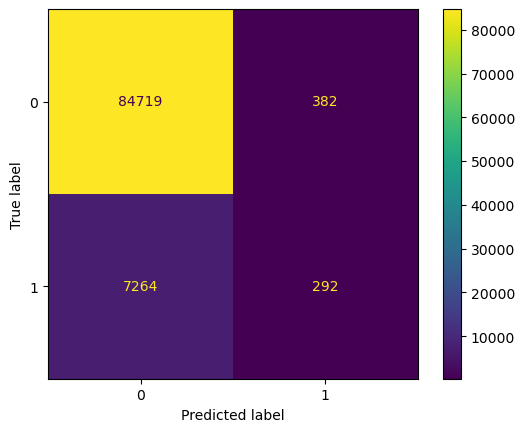

In [40]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn))

**XGBoost Classifier**

In [41]:
xgb = XGBClassifier(
    eval_metric="error",
    early_stopping_rounds=10
)

eval_set = [(X_test, y_test)]

model = xgb.fit(
    X_train, y_train,
    eval_set=eval_set,
    verbose=True
)

[0]	validation_0-error:0.08155
[1]	validation_0-error:0.08155
[2]	validation_0-error:0.08155
[3]	validation_0-error:0.08112
[4]	validation_0-error:0.08113
[5]	validation_0-error:0.08117
[6]	validation_0-error:0.08118
[7]	validation_0-error:0.08117
[8]	validation_0-error:0.08113
[9]	validation_0-error:0.08108
[10]	validation_0-error:0.08113
[11]	validation_0-error:0.08113
[12]	validation_0-error:0.08109
[13]	validation_0-error:0.08101
[14]	validation_0-error:0.08098
[15]	validation_0-error:0.08101
[16]	validation_0-error:0.08099
[17]	validation_0-error:0.08107
[18]	validation_0-error:0.08094
[19]	validation_0-error:0.08092
[20]	validation_0-error:0.08094
[21]	validation_0-error:0.08092
[22]	validation_0-error:0.08092
[23]	validation_0-error:0.08093
[24]	validation_0-error:0.08092
[25]	validation_0-error:0.08091
[26]	validation_0-error:0.08099
[27]	validation_0-error:0.08102
[28]	validation_0-error:0.08102
[29]	validation_0-error:0.08097
[30]	validation_0-error:0.08099
[31]	validation_0-

In [42]:
y_pred_xgb = model.predict(X_test)

In [43]:
print('XGBoost_accuracy:',(accuracy_score(y_test,y_pred_xgb)))

XGBoost_accuracy: 0.9190886819128614


In [44]:
# Print the classification report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     85101
           1       0.55      0.04      0.08      7556

    accuracy                           0.92     92657
   macro avg       0.74      0.52      0.52     92657
weighted avg       0.89      0.92      0.89     92657



**Artificial Neural Network(ANN)**

In [45]:
num_features = X_train.shape[1]  # Gets the number of columns (features)
print(f"Number of features: {num_features}")

Number of features: 18


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [47]:
model = Sequential([
    # Input layer (MUST match feature count)
    Dense(64, activation='relu', input_shape=(18,)),  # 18 neurons for 18 features
    
    # Hidden layers 
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.3),  # Reduces overfitting
    Dense(64, activation='relu'),
    
    # Output layer (binary classification)
    Dense(1, activation='sigmoid')
])

In [48]:
#for updating weight
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1216      
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                        

In [50]:
model.fit(X_train,y_train,batch_size=10,epochs=10)

Epoch 1/10
21620/21620 [==============================] - 20s 871us/step - loss: 0.2393 - accuracy: 0.9194
Epoch 2/10
21620/21620 [==============================] - 20s 933us/step - loss: 0.2339 - accuracy: 0.9194
Epoch 3/10
21620/21620 [==============================] - 21s 964us/step - loss: 0.2327 - accuracy: 0.9194
Epoch 4/10
21620/21620 [==============================] - 20s 922us/step - loss: 0.2327 - accuracy: 0.9194
Epoch 5/10
21620/21620 [==============================] - 19s 871us/step - loss: 0.2325 - accuracy: 0.9194
Epoch 6/10
21620/21620 [==============================] - 20s 932us/step - loss: 0.2325 - accuracy: 0.9193
Epoch 7/10
21620/21620 [==============================] - 18s 843us/step - loss: 0.2313 - accuracy: 0.9193
Epoch 8/10
21620/21620 [==============================] - 18s 843us/step - loss: 0.2316 - accuracy: 0.9195
Epoch 9/10
21620/21620 [==============================] - 18s 838us/step - loss: 0.2316 - accuracy: 0.9193
Epoch 10/10
21620/21620 [============

In [51]:
loss,acc=model.evaluate(X_test,y_test)
print('ANN_accuracy:',acc)
print('loss:',loss)

2896/2896 [==============================] - 2s 635us/step - loss: 0.2291 - accuracy: 0.9185
ANN_accuracy: 0.9184519052505493
loss: 0.2291153520345688


In [65]:
print('knn_accuracy:',(accuracy_score(y_test,y_pred_knn)))
print('XGBoost_accuracy:',(accuracy_score(y_test,y_pred_xgb)))
print('ANN_accuracy:',acc)

knn_accuracy: 0.9174806004942961
XGBoost_accuracy: 0.9190886819128614
ANN_accuracy: 0.9184519052505493
